In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/heart_disease.csv')

Task 2: Exploratory Data Analysis (EDA)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,reversable defect,4


In [5]:
df.shape

(908, 13)

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [7]:
# Check for missing values
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [8]:

# Visualize feature distributions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [9]:
!pip install --upgrade seaborn

Task 3: Feature Engineering

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Check for typos and ensure the column exists. If the column name is different,
# replace 'column_name' with the correct name
df['category'] = le.fit_transform(df['age']) # Replaced 'column_name' with 'age'

Task 4: Decision Tree Classification

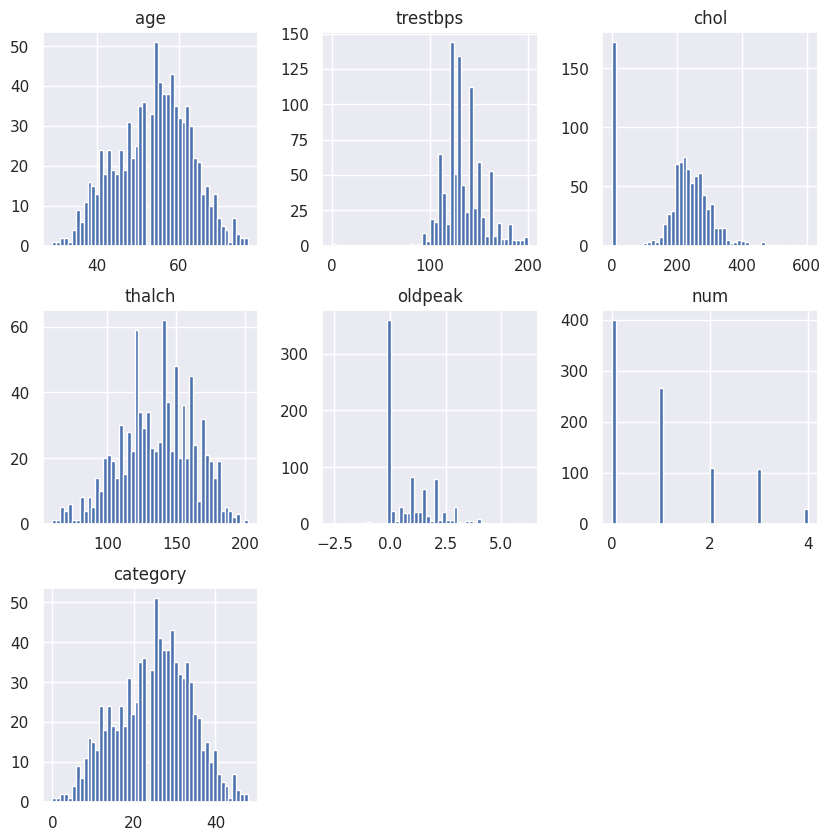

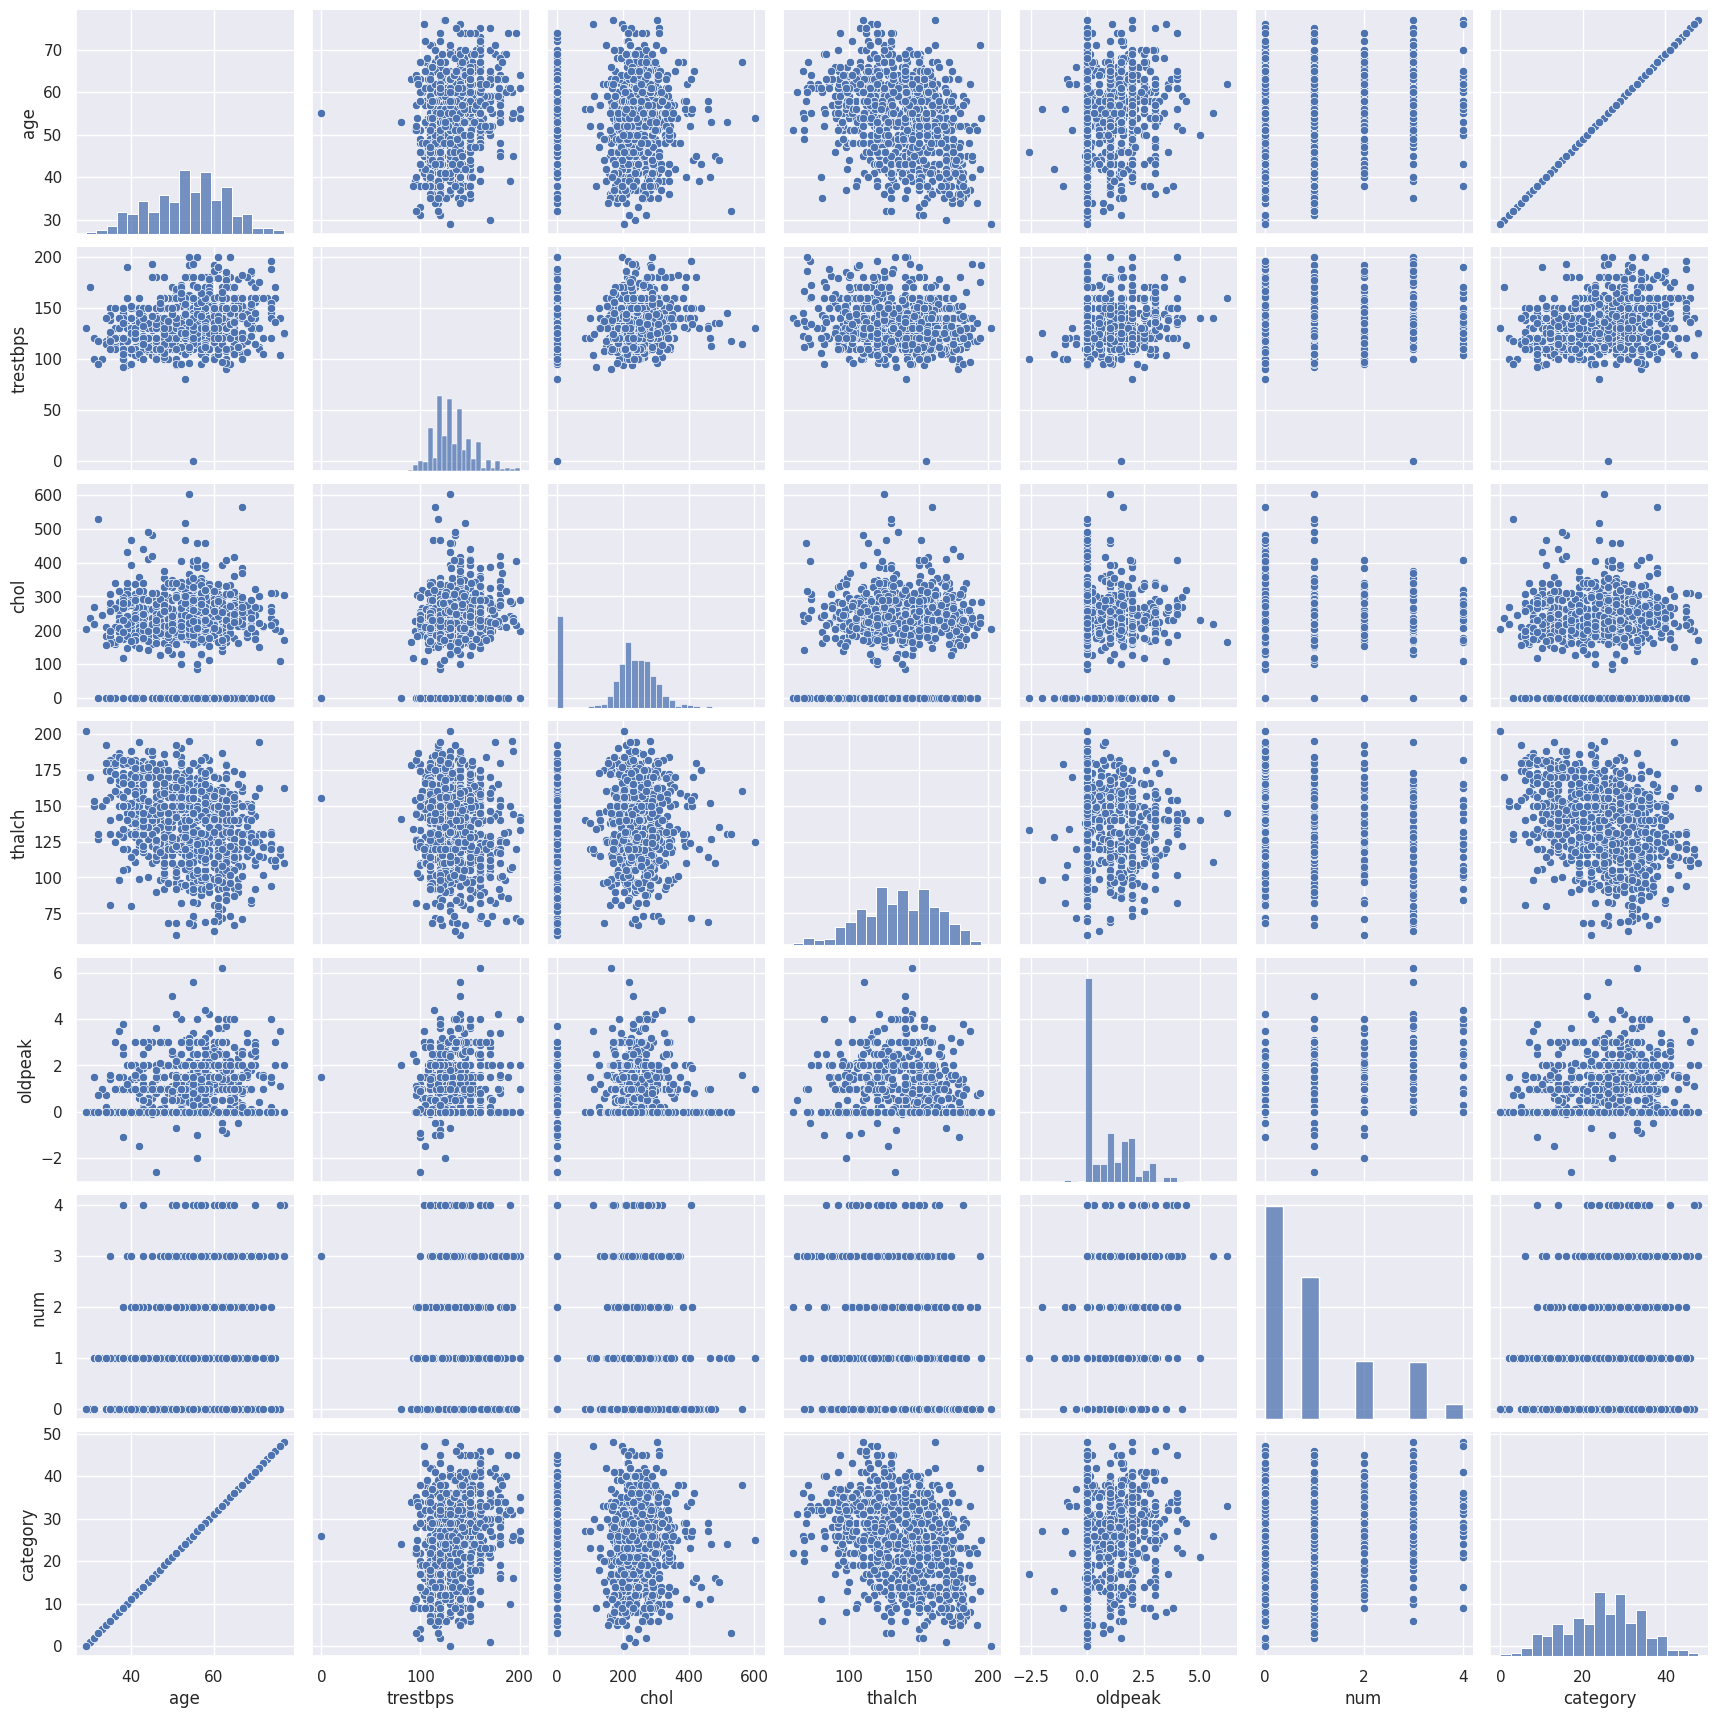

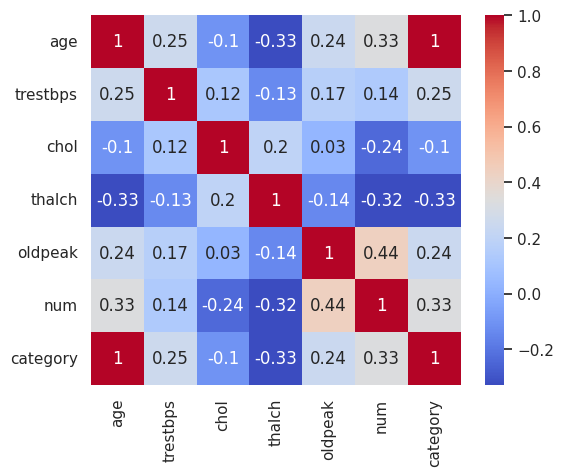

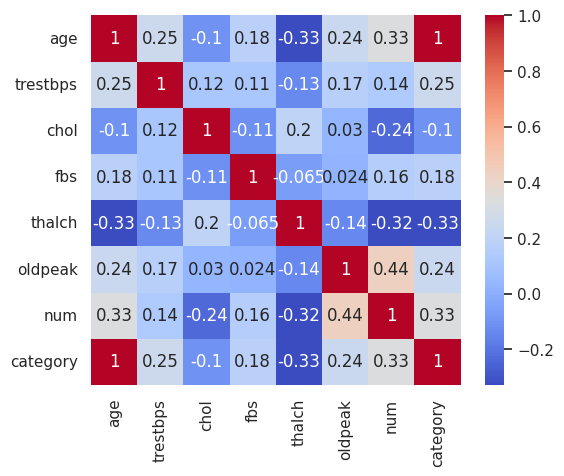

In [11]:
# Convert 'age' and 'income' columns to numeric, handling non-numeric values
df['age'] = pd.to_numeric(df['age'], errors='coerce')

if 'income' in df.columns:
    df['income'] = pd.to_numeric(df['income'], errors='coerce')

#Drop problematic column
if 'ST depression induced by exercise relative to rest' in df.columns:
    df = df.drop('ST depression induced by exercise relative to rest', axis=1)


if 'Gender' in df.columns:
    df = df.drop('Gender', axis=1)


# Histograms
df.hist(bins=50, figsize=(10, 10))

# Box plots
sns.boxplot(data=df,y=df['age'].dropna())
plt.title('Age Distribution')
plt.show()

if 'income' in df.columns:
    sns.boxplot(data=df,y='income')
    plt.title('Income Distribution')
    plt.show()


# Pair plot
# Drop non-numeric columns for pairplot
df_numeric = df.select_dtypes(include=['number'])

# Create the pairplot with aspect ratio set to 'auto'
sns.pairplot(df_numeric, aspect=1.0)


# Calculate the correlation matrix and plot
corr_matrix = df_numeric.corr()

# Create a new figure and axes for the heatmap
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, ax=ax) # Specify the axes for the heatmap
plt.show()

# Correlation matrix
corr_matrix = df.corr(numeric_only=True) # Add numeric_only=True
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define the features and target variable
X = df.drop(columns=['num'])  # Features (independent variables)
y = df['num']  # Target variable (dependent variable)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape  # Check the shape of the splits to ensure it's correct


((726, 13), (182, 13))

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Evaluate performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
##roc_auc = roc_auc_score(y_test, y_prob)

accuracy


0.510989010989011

In [14]:
from sklearn.metrics import roc_auc_score
# Calculate ROC AUC score with multi_class parameter set to 'ovo'
roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovo') # Use clf.predict_proba to get probabilities for all classes

0.5785477878587594

In [15]:
f1_score(y_test, y_pred, average='macro') # Change average to 'micro', 'macro', or 'weighted'

0.3264285196048963

In [16]:
recall_score(y_test, y_pred, average='macro') # Change average to 'micro', 'macro', or 'weighted'

0.3256764605740151

In [17]:
precision_score(y_test, y_pred, average='macro') # Change average to 'micro', 'macro', or 'weighted'

0.3276363636363636

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74        89
           1       0.32      0.33      0.33        48
           2       0.32      0.32      0.32        22
           3       0.27      0.24      0.25        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.33      0.33      0.33       182
weighted avg       0.51      0.51      0.51       182



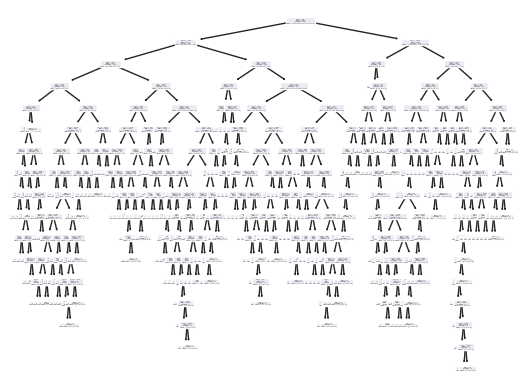

In [19]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

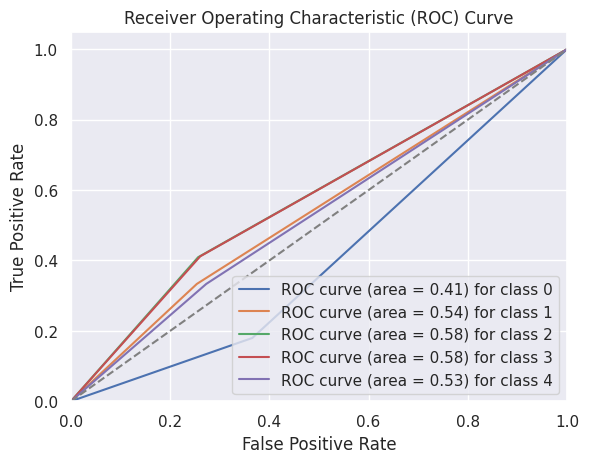

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Assuming y_test is the true labels and y_pred contains predicted probabilities for the positive class

# Binarize the output
y_test_bin = label_binarize(y_test, classes=range(y_test.nunique()))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC-AUC score for multiclass classification
fpr = dict()
tpr = dict()
roc_auc = dict()

# Iterate over each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob)
    roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_prob)

# Plot the ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [21]:
#HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters and their values to tune
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Setup the grid search with cross-validation (cv=5)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Use the best model to predict on the test data
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluate the tuned model on the test set
# Evaluate the tuned model on the test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro') # Added average='macro'
recall_best = recall_score(y_test, y_pred_best, average='macro') # Added average='macro'
f1_best = f1_score(y_test, y_pred_best, average='macro') # Added average='macro'

# Get probabilities for all classes
y_prob_best = best_model.predict_proba(X_test)
roc_auc_best = roc_auc_score(y_test, y_prob_best, multi_class='ovr') # Added multi_class='ovr'

# Print out the results
print("Test Accuracy:", accuracy_best)
print("Test Precision:", precision_best)
print("Test Recall:", recall_best)
print("Test F1 Score:", f1_best)
print("Test ROC-AUC Score:", roc_auc_best)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.5316863486065186
Test Accuracy: 0.5714285714285714
Test Precision: 0.26987562363853557
Test Recall: 0.31784534038334433
Test F1 Score: 0.2918541775684633
Test ROC-AUC Score: 0.7399257768280598


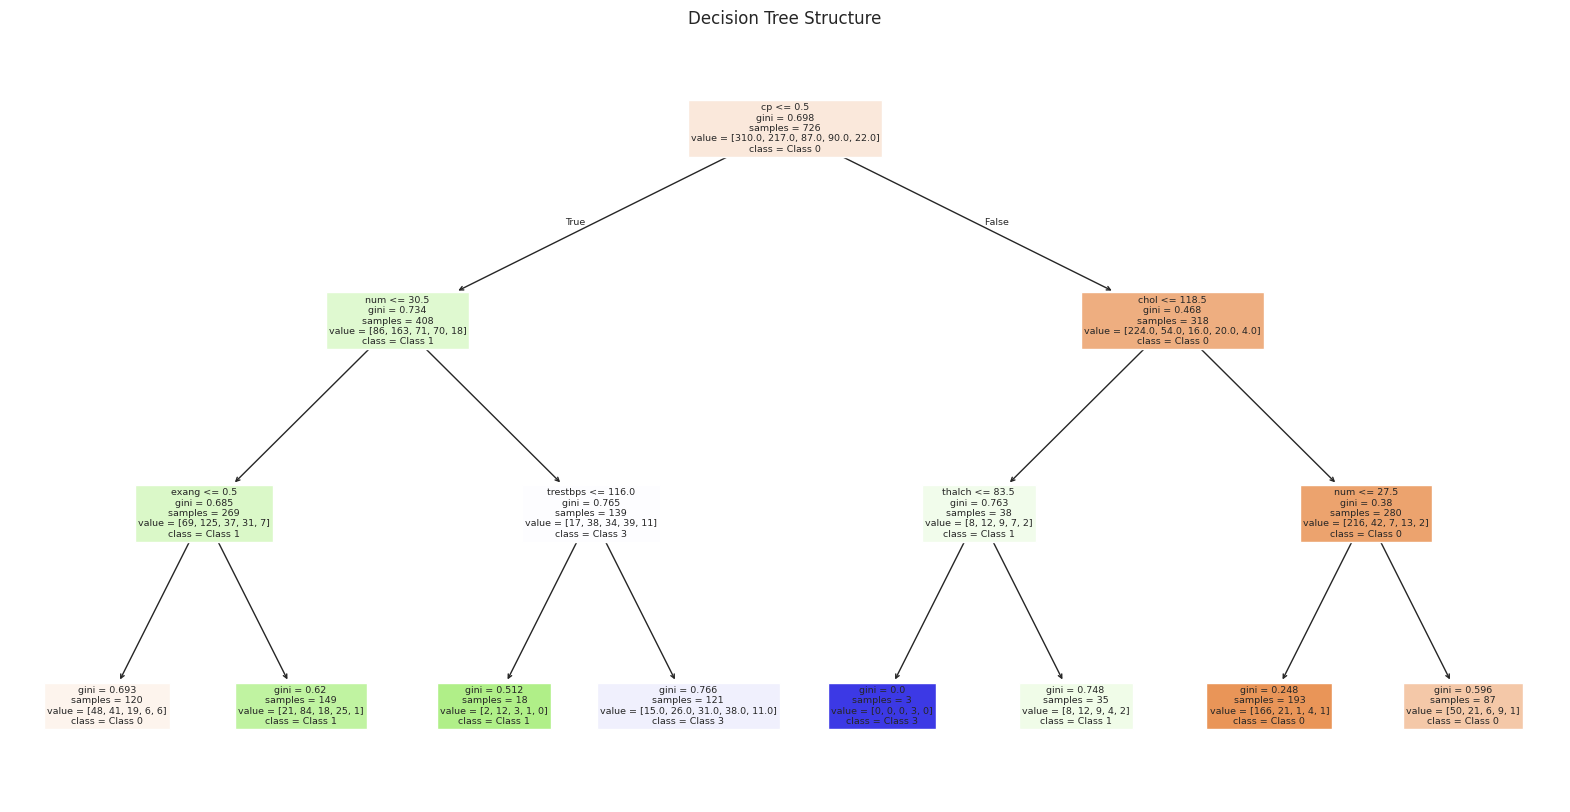

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Check the number of unique values in your target variable
num_classes = len(np.unique(y))

# Define class names based on the number of classes
class_names = [f"Class {i}" for i in range(num_classes)] # Or provide more descriptive names if available


# Visualize the best decision tree
plt.figure(figsize=(20,10))

# Ensure X is defined and in scope - it is likely defined
# in a previous cell or needs to be loaded.
# If you have a dataframe named df, and your features are in columns 0-12
# you could use the following line:
X = df

plot_tree(best_model, feature_names=X.columns, class_names=class_names, filled=True)
plt.title("Decision Tree Structure")
plt.show()


     Feature  Importance
2         cp    0.561583
12       num    0.149249
4       chol    0.132195
8      exang    0.085982
3   trestbps    0.043602
7     thalch    0.027389
0        age    0.000000
1        sex    0.000000
5        fbs    0.000000
6    restecg    0.000000
9    oldpeak    0.000000
10     slope    0.000000
11      thal    0.000000


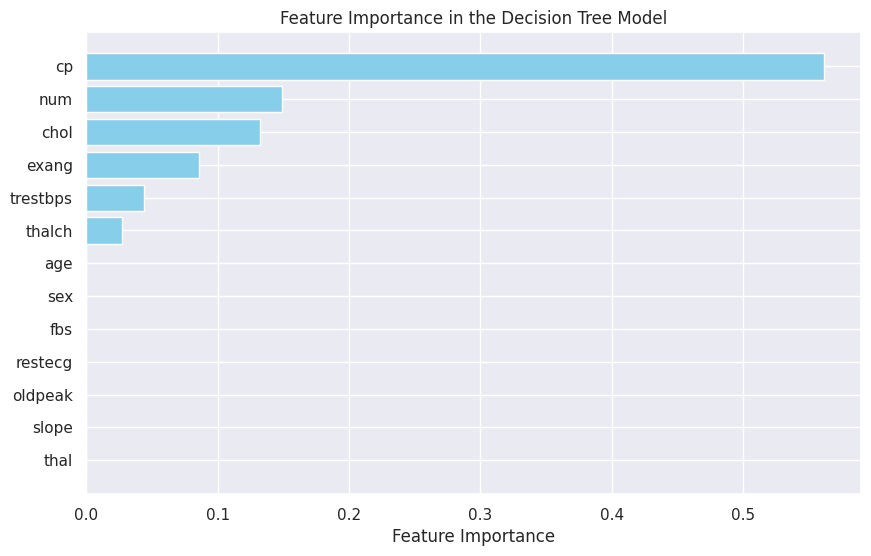

In [26]:
import pandas as pd
import numpy as np

# Get feature importance
feature_importance = best_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns[:len(feature_importance)], # Sliced X.columns to match the length of feature_importance
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_importance_df['Feature']), feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in the Decision Tree Model')
plt.gca().invert_yaxis()  # Invert y-axis to display top feature at the top
plt.show()

In [25]:
#INTERVIEW QUESTION:

 What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

What is the difference between the Label encoding and One-hot encoding?

Label Encoding


Description: Label encoding assigns a unique integer to each category in a categorical feature.
Example:
For a categorical feature like "Color" with categories [Red, Blue, Green], label encoding might map them as follows:
Red → 0
Blue → 1
Green → 2
Advantages:
Simple and easy to implement.
Works well with ordinal (ranked) categories where the order of values matters (e.g., Small, Medium, Large).
Disadvantages:
Can introduce unintended ordinal relationships between categories. For instance, in the above example, the model might infer that Green (2) is "greater than" Blue (1), which could be misleading if the categories don't have a natural order.
Best Use Case: Useful when the categorical variable is ordinal, meaning the categories have a meaningful order.


2. One-Hot Encoding


Description: One-hot encoding converts each category into a new binary feature (0 or 1), where each unique category is represented by a separate column.
Example:
For the same "Color" feature with categories [Red, Blue, Green], one-hot encoding would transform it into three new features:
Red → [1, 0, 0]
Blue → [0, 1, 0]
Green → [0, 0, 1]
Advantages:
Avoids the introduction of ordinal relationships between categories.
Each category is treated independently, making this method appropriate for nominal (non-ordinal) categorical variables.
Disadvantages:
Increases the dimensionality of the dataset, especially if the feature has many unique categories. This is known as the "curse of dimensionality."
Best Use Case: Best for nominal categorical features where categories don't have a natural order (e.g., colors, types of animals).